# How Duration and Distance Differ Across Other Charactersitics ?

## Investigation Overview


> The focus will be on factors affecting trip duration and distance.<br>
Starting by demonstrating the distribution of both features by plotting histogram and pointing out to the exreme values that are outliers
by plotting boxplot of each.<br>
Then, I will move to the relationship between all numberic variables by plotting scatterplot matrix and heatmap to indicate the strength of the relationship (correlation factor).<br>
Next, investigating the categorical variables effect on duration and distance using pair grid of boxplots.<br>
Finally, I will show the effect on duration and distance over time by each categorical variables.


## Dataset Overview

> The dataset includes information about individual rides made in a bike-sharing system covering the greaterSan Francisco Bay area.<br>
It has 183,412 observatons with total 16 columns with numerical, categorical, time, and location data.<br>
After wrangling and feature engineering, the cleaned dataset has 174,952 observations with total 24 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
cleaned_bike_df = pd.read_csv('cleaned_201902-fordgobike-tripdata.csv')

In [3]:
# converting date fields back to date format
def apply_typ_to_col(df, typ_col_dic):
    '''
    Modify the types of dataframe columns from the type and column pairs of the dictionary
    
        Parameters:
            df (dataframe): its columns will be modifed based on the type and column dictionary
            typ_col_dic (dictionary): contains the type-column pairs where type is a singel value, column is a list
            
        Returns:
            df (dataframe): the modifed dataframe
    '''
    for typ, col_list in typ_col_dic.items():  
        for col in col_list:
            df[col] = df[col].astype(typ)
    return df


typ_col_dic = {'datetime64':['start_date_time', 'end_date_time', 'start_date', 'end_date']}
cleaned_bike_df = apply_typ_to_col(cleaned_bike_df, typ_col_dic)

## Distribution of Duration

>The shape of Duration takes a normal distribution showing that most trips duration falls between 100 and 3,000 seconds and the most occuring trip durations is between 300 and 1,000 seconds.

>From the boxplot, we can see that extreme values of Duration, in other words, outliers seem to be all values greater than 1,500 seconds.<br>
As shown in the histogram distribution, there are only very few of them, however they take very huge values compared to the general distribution of duration.<br>
For the duration, the expected minimum value is around 100 seconds and the expected maximum value is around 1,500 seconds. The median is 500 seconds, with the lower 25% around 300 seconds and the upper 75% around 750 seconds.

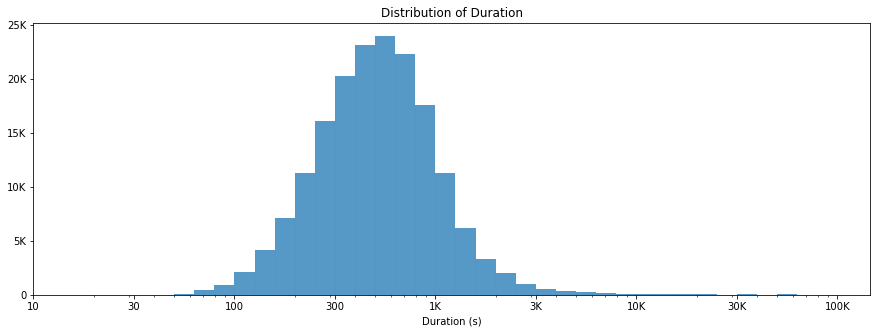

In [4]:
plt.figure(figsize=[15,5])
log_binsize = 0.1
log_bins = 10 ** np.arange(1.7, 5+log_binsize, log_binsize)
log_ticks = [10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4, 10**4.5, 10**5]
log_labels = ['10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K']

ax = sns.histplot(data=cleaned_bike_df, x='duration_sec', bins=log_bins)
plt.xscale('log')
plt.xticks(log_ticks, log_labels)
ax.set_yticklabels(['0', '5K', '10K', '15K', '20K', '25K'])
plt.xlabel('Duration (s)')
plt.ylabel(None)
plt.title('Distribution of Duration');

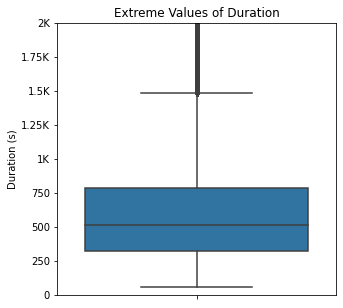

In [5]:
plt.figure(figsize=[5,5])

ax = sns.boxplot(data=cleaned_bike_df, y='duration_sec')
plt.ylim(bottom=0, top=2000)
plt.yticks(ticks=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000], labels=['0', '250', '500', '750', '1K', '1.25K', '1.5K',\
                                                                  '1.75K', '2K'])
plt.ylabel('Duration (s)')
plt.title('Extreme Values of Duration');

## Distribution of Distance

>The shape of Distance takes a normal distribution showing that most trips distance falls between 300 and 10,000 meters and the most occuring trip distance is between 1,000 and 3,000 meters.

>From the boxplot, we can see that extreme values of Distance, in other words, outliers seem to be all values greater than about 4,000 meters.<br>
For the distance, the expected minimum value is 0 meters (that indicates that users have returned to the same station that they started from, these only happen almost 1% of the data) and the expected maximum value is around 4000 meters. The median is around 1,500 meters, with the lower 25% around 1,000 meters and the upper 75% around 2000 meters.

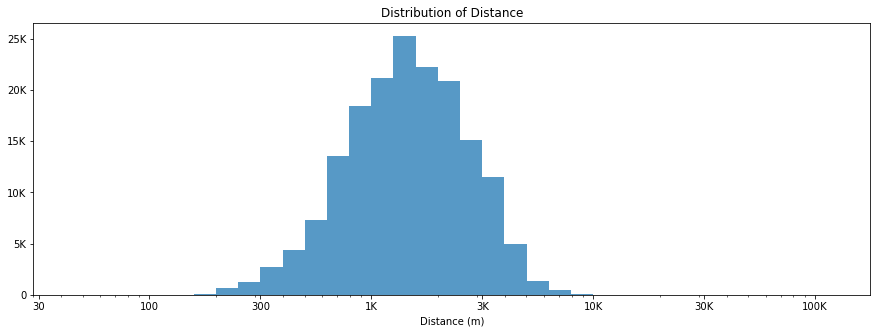

In [6]:
plt.figure(figsize=[15,5])

log_binsize = 0.1
log_bins = 10 ** np.arange(0, 5+log_binsize, log_binsize)
log_ticks = [10**0, 10**0.5, 10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4, 10**4.5, 10**5]
log_labels = ['1', '3', '10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K']

ax = sns.histplot(data=cleaned_bike_df, x='distance_m', bins=log_bins)
plt.xscale('log')
plt.xticks(log_ticks, log_labels)
plt.xlim(left=30)
plt.xlabel('Distance (m)')
y_ticks = ['0', '5K', '10K', '15K', '20K', '25K']
ax.set_yticklabels(y_ticks)
plt.ylabel(None)
plt.title('Distribution of Distance');

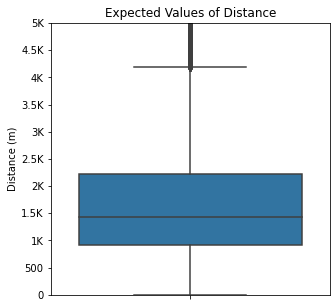

In [7]:
plt.figure(figsize=[5,5])

sns.boxplot(data=cleaned_bike_df, y='distance_m')
plt.ylim(bottom = 0, top=5000)
plt.yticks(ticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], labels=['0', '500', '1K', '1.5K', '2K',\
                                                                  '2.5K', '3K', '3.5K', '4K', '4.5K', '5K'])
plt.ylabel('Distance (m)')
plt.title('Expected Values of Distance');

## Relationship between Duration, Distance, and Age

> There is a positive linear relationship between duration and distance with correlation of 0.675<br>
Age, however, doesn't seem to have any linear realtioship with any of the two features.

In [8]:
numeric_vars = ['duration_sec', 'distance_m', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

def impute_outliers(df, col, method='median'):
    '''
    Impute outliers of numeric columns by the specifed method
    
        Parameters:
            df (dataframe): the dataframe that has the data
            col (string): string that represents the numeric column name that has outliers to be imputed
            method (string): string for the method to be used in the imputation
        Returns:
            None
    '''
    if method == 'mean':
        value = df[col].mean()
    elif method == 'median':
        value = df[col].median()     
    elif method == 'mode':
        value = df[col].mode()
    else:
        print('Couldn\'t impute {}. Please use on of these methods: mean, median, or mode'.format(col))
        return None
 
    iqr = df[col].quantile(.75) - df[col].quantile(.25)
    upper_fence = df[col].quantile(.75) + 1.5 * iqr
    lower_fence = df[col].quantile(.25) - 1.5 * iqr
    
    df[col] = np.where((df[col] < lower_fence) | (df[col] > upper_fence), value, df[col])
    
               
non_outliers_df = cleaned_bike_df.copy()

impute_outliers(non_outliers_df, 'duration_sec')
impute_outliers(non_outliers_df, 'distance_m')

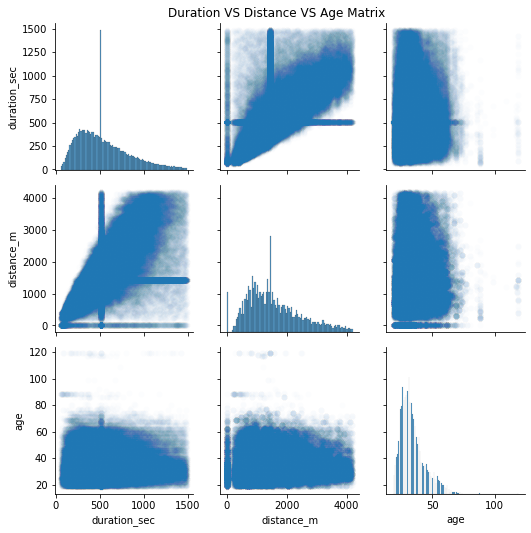

In [9]:
mtx = sns.PairGrid(data=non_outliers_df, vars=numeric_vars)
mtx.map_diag(sns.histplot)
mtx.map_offdiag(sns.scatterplot, alpha=0.01)
mtx.fig.subplots_adjust(top=0.95)
mtx.fig.suptitle('Duration VS Distance VS Age Matrix');

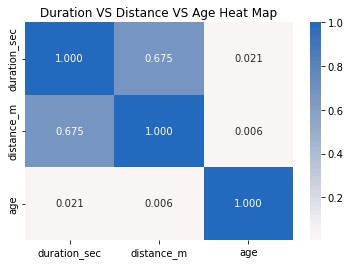

In [10]:
sns.heatmap(non_outliers_df[numeric_vars].corr(), annot=True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Duration VS Distance VS Age Heat Map');

## Distribution of Duration, Distance, and Age By User Type, Gender, and Bike Share Service

> Duration seems to be affected by the different categories where user type and bike share service show clear distinction in ranges for each class on the oppostie of gender where the classes are almost the same. This is also true for the distance travelled.<br>
Customers and users with no bike share service have higher median trip durations and distance traveled. Also, females users have the same behaviour where they are higher in median compared to males and "Other" category.<br>
As for the age, it seems almost constant across the different categories with median of about 35.<br>

<Figure size 1440x1440 with 0 Axes>

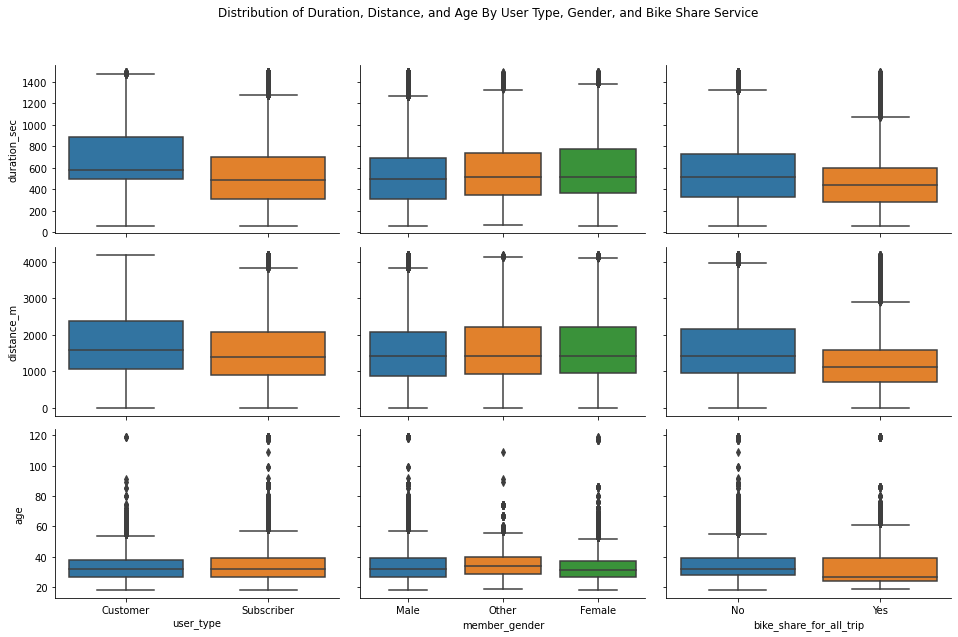

In [11]:
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = non_outliers_df, y_vars = numeric_vars, x_vars = categoric_vars, height = 3, aspect = 1.5)
g.map(sns.boxplot)
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Distribution of Duration, Distance, and Age By User Type, Gender, and Bike Share Service');

## Duration and Distance by User Type, Gender, and Bike Share Service Over Time

> We can see that Duration by User Type has a spike on Feb.9 for customers with average duration of 2,500 seconds while subscriber appears constant over time with average between 500 and 750. If we look at the distance, we see a strange behaviour on the day a spike for duration occurred for customers (Feb.9), there is actually a downtrend of travelled distance. Which suggests that users stopped traviling for some reason while keeping the bike with them. Also, the trend for subscribers users in travlled distance is an uptrend while thier duration was constant. This suggests that they increased speed overtime.<br><br>
From the Duration by Gender plot, the trend is usually Other category is higher on average second. However, female users have exceeded Other category on Feb.9, same day the customers type users had spike on. We also see a high steep of Other category in terms of distance travelled on Feb.9. But in generall, Other category have travlled more on average.<br><br>
For Duration by Users with Bike Share Service, we can notice a pattern of spikes on Feb.10, Feb.17, Feb.23 for both users that have the service and the users who don't. These spikes occurr with about 6 days difference. However, there doesn't seem to be any spikes for the distance travelled

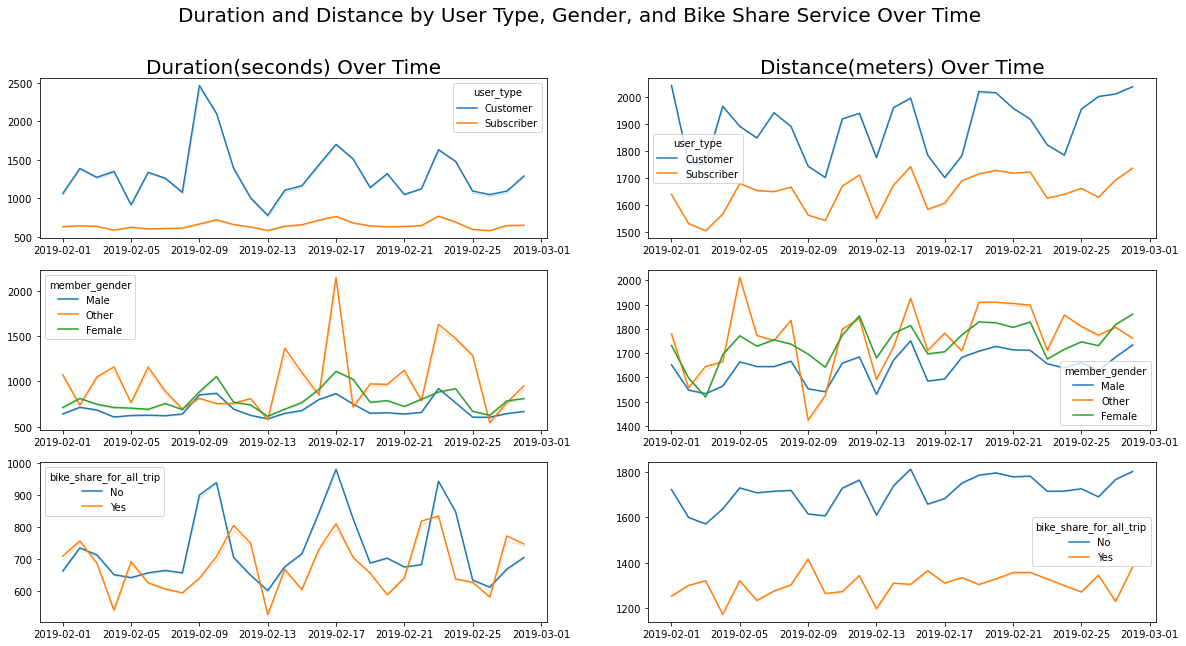

In [17]:
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [20,10])

plt.suptitle('Duration and Distance by User Type, Gender, and Bike Share Service Over Time', fontsize=20)
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.lineplot(data = cleaned_bike_df, x = 'start_date', y = 'duration_sec', ax = ax[i,0], hue=var, ci=0)
    ax[i,0].set(xlabel=None)
    ax[i,0].set(ylabel=None)
    sns.lineplot(data = cleaned_bike_df, x = 'start_date', y = 'distance_m', ax = ax[i,1], hue=var, ci=0)
    ax[i,1].set(xlabel=None)
    ax[i,1].set(ylabel=None)

ax[0,0].set_title('Duration(seconds) Over Time', fontsize=20)
ax[0,1].set_title('Distance(meters) Over Time', fontsize=20);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt